In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("DONE")

DONE


In [70]:
url='./Bird_Strikes.csv'
data=pd.read_csv(url,index_col='Record ID')
#data.head()
clr=sns.color_palette('crest')
#data.info()
#data.nunique()
#data.shape
#data.columns
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25558 entries, 204061 to 319680
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Aircraft: Type                           25429 non-null  object
 1   Airport: Name                            25429 non-null  object
 2   Altitude bin                             25429 non-null  object
 3   Aircraft: Make/Model                     25558 non-null  object
 4   Wildlife: Number struck                  25429 non-null  object
 5   Wildlife: Number Struck Actual           25558 non-null  int64 
 6   Effect: Impact to flight                 2078 non-null   object
 7   FlightDate                               25429 non-null  object
 8   Effect: Indicated Damage                 25558 non-null  object
 9   Aircraft: Number of engines?             25291 non-null  object
 10  Aircraft: Airline/Operator               25429 non-null  

In [71]:
#print("Initial Data:\n", data.head())

# Display basic information about the dataframe
print("\nData Info:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Handle missing values (example: filling with mean, median or mode, or dropping)
# Here we'll fill numeric columns with mean and categorical columns with mode
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

print("\nData After Handling Missing Values:\n", data.isnull().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)
print("\nData After Removing Duplicates:\n", data)

# Fix data types (if necessary)
# For example, converting a column to datetime
# df['date_column'] = pd.to_datetime(df['date_column'])

# Handle outliers (example: capping outliers)
# Here we'll cap outliers to the 95th percentile
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    upper_limit = data[column].quantile(0.95)
    data[column] = data[column].apply(lambda x: upper_limit if x > upper_limit else x)


print("\nCleaned Data:\n", data.head())

# Save the cleaned dataset to a new CSV file
#data.to_csv('cleaned_dataset.csv', index=False)



Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 25558 entries, 204061 to 319680
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Aircraft: Type                           25429 non-null  object
 1   Airport: Name                            25429 non-null  object
 2   Altitude bin                             25429 non-null  object
 3   Aircraft: Make/Model                     25558 non-null  object
 4   Wildlife: Number struck                  25429 non-null  object
 5   Wildlife: Number Struck Actual           25558 non-null  int64 
 6   Effect: Impact to flight                 2078 non-null   object
 7   FlightDate                               25429 non-null  object
 8   Effect: Indicated Damage                 25558 non-null  object
 9   Aircraft: Number of engines?             25291 non-null  object
 10  Aircraft: Airline/Operator               2542

C:\Users\khush\AppData\Local\Temp\ipykernel_3380\219511841.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
C:\Users\khush\AppData\Local\Temp\ipykernel_3380\219511841.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



1. **Incident Analysis:**
   - What is the distribution of bird strikes over the years?
   - Which months have the highest number of bird strikes?
   - What are the most common phases of flight during which bird strikes occur?
   - Which airports report the highest number of bird strikes?


In [4]:
from datetime import datetime
def extract_date_components(date_str):
    if isinstance(date_str, str):
        try:
            # Strip any leading/trailing whitespace and parse the date
            #print(f"Parsing date string: {date_str.strip()}")
            date_obj = datetime.strptime(date_str.strip(), '%d-%m-%Y')
            return pd.Series([date_obj.year, date_obj.month, date_obj.day])
        except ValueError as e:
            # Print the error message for debugging
            #print(f"Error parsing date string '{date_str}': {e}")
            # Return NaN for all components if there is a parsing error
            return pd.Series([pd.NA, pd.NA, pd.NA])
    else:
        # Print the type of value that caused an issue
        #print(f"Non-string date value: {date_str} (type: {type(date_str)})")
        # Return NaN for all components if the value is not a string
        return pd.Series([pd.NA, pd.NA, pd.NA])


data[['year', 'month', 'day']] = data['FlightDate'].apply(extract_date_components)


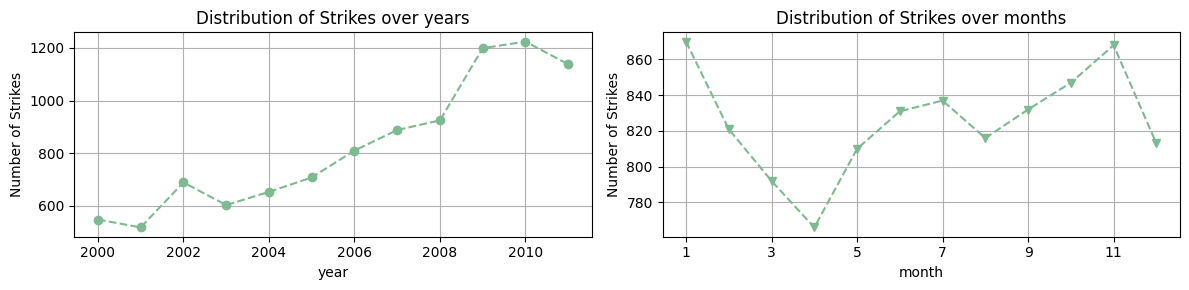

In [30]:
fig,ax=plt.subplots(1,2,figsize=(12,3))
color2=sns.color_palette("hls", 12)
data['year'].value_counts().sort_index().plot(kind='line',marker='o',linestyle='--',color=clr,ax=ax[0])
ax[0].set_ylabel('Number of Strikes')
ax[0].set_title('Distribution of Strikes over years')
plt.grid()
data['month'].value_counts().sort_index().plot(kind='line',marker='v',linestyle='--',color=clr,ax=ax[1])
ax[1].set_ylabel('Number of Strikes')
ax[1].set_title('Distribution of Strikes over months')

ax[0].grid()
ax[1].grid()
# Show the plot
plt.tight_layout()
plt.show()

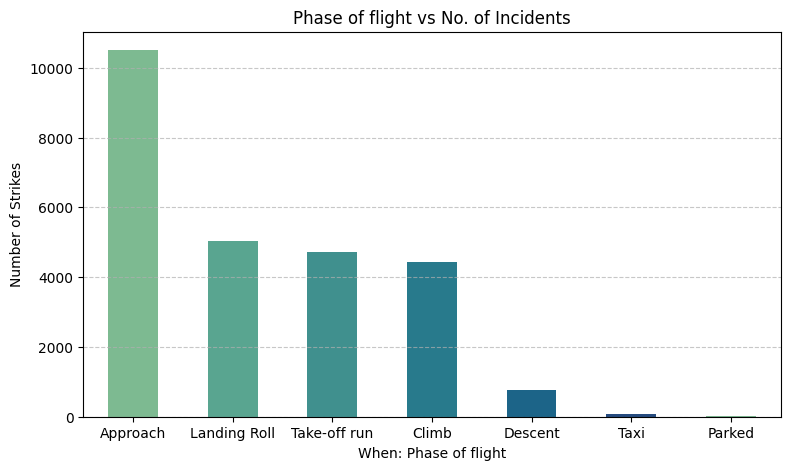

In [6]:
data['When: Phase of flight'].value_counts().plot(kind='bar',figsize=(9,5),color=clr)
plt.ylabel('Number of Strikes')
plt.title("Phase of flight vs No. of Incidents")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Top 50 Airports who have experienced Bird Strikes :
Origin State
California      2967
Texas           2450
Florida         2054
New York        1319
Illinois        1007
Pennsylvania     986
Missouri         960
Kentucky         812
Ohio             778
Hawaii           729
Name: count, dtype: int64


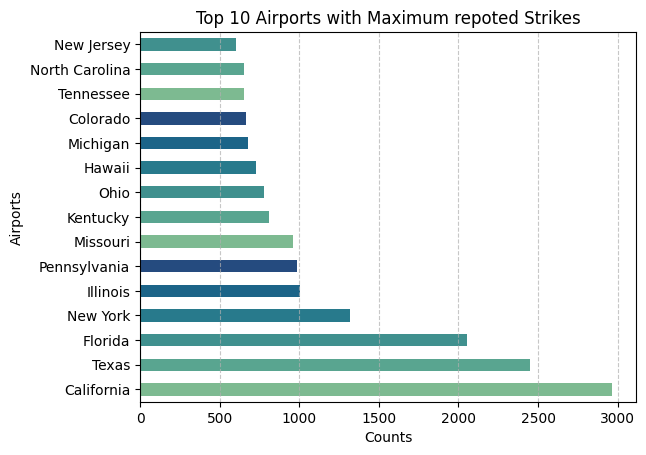

In [32]:
#top 50 Airports who reported bird strikes
print("Top 50 Airports who have experienced Bird Strikes :")
print(data["Origin State"].value_counts().iloc[:10])
data["Origin State"].value_counts().iloc[:15].plot(kind='barh',color=clr)
plt.title("Top 10 Airports with Maximum repoted Strikes")
plt.ylabel('Airports')
plt.xlabel('Counts')
plt.grid(axis='x', linestyle='--', alpha=0.7)

2. **Aircraft and Airline Analysis:**
   - Which aircraft types are most frequently involved in bird strikes?
   - Which airlines report the most bird strikes?
   - How are number of Bird Strikes related to other parameters?
3. **Altitude and Location Analysis:**
   - What are the conditions in which maximum bird strikes occur?
   - At what altitudes do most bird strikes occur?
   - Is there a relationship between weather conditions (precipitation, sky conditions) and the occurrence of bird strikes?
   - How does the number of bird strikes vary by state of origin?

C:\Users\khush\AppData\Local\Temp\ipykernel_3380\2584094148.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


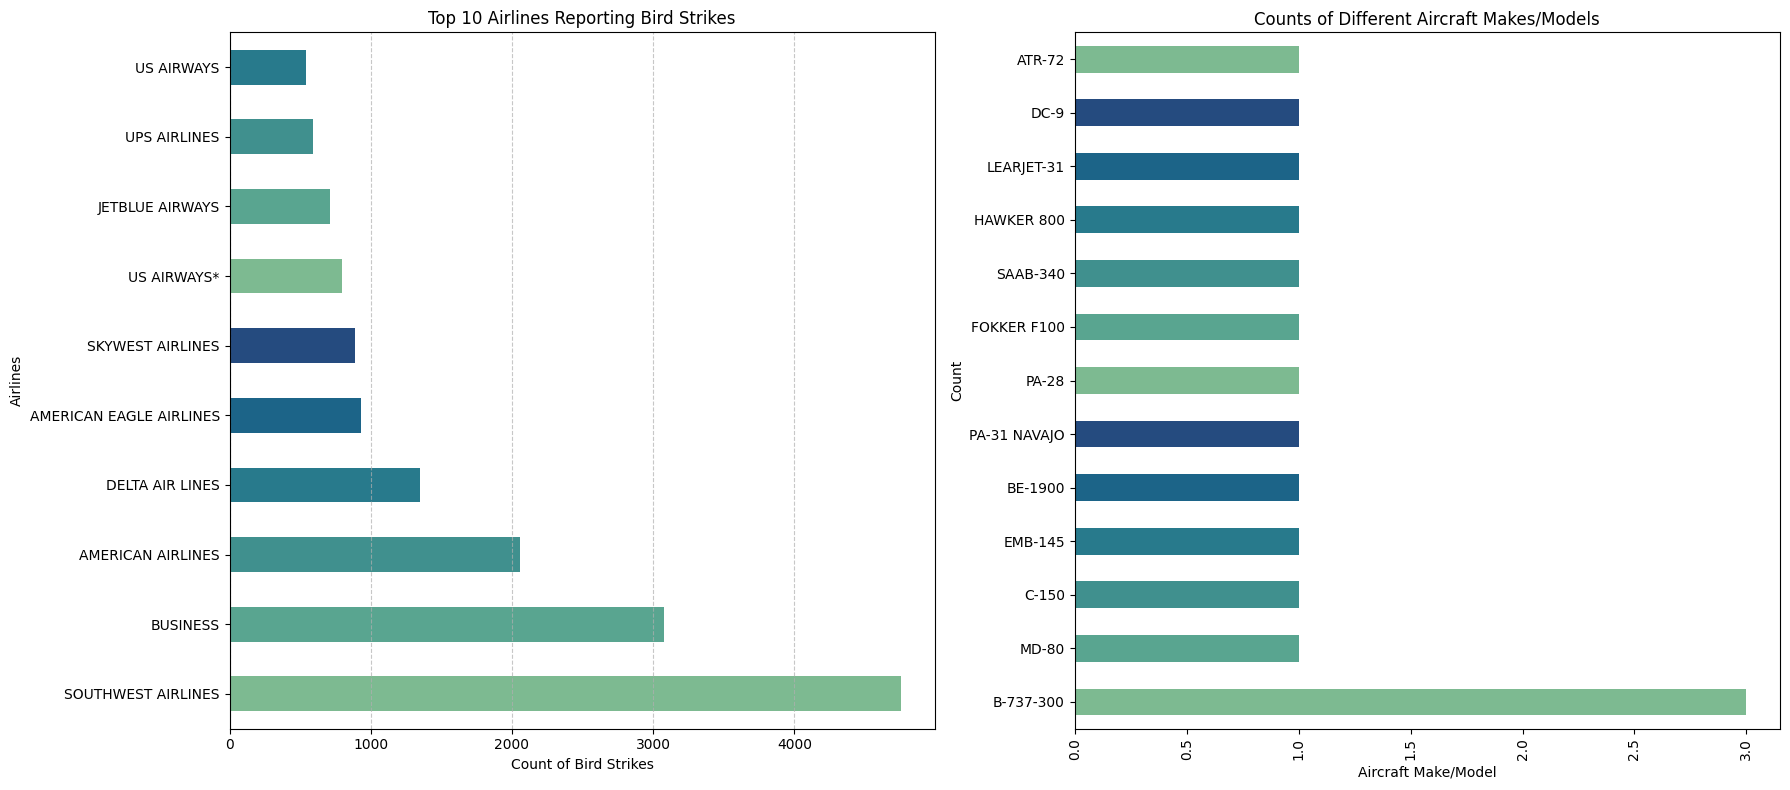

In [8]:
# Plot 1: Top 10 airlines reporting the highest number of bird strikes
top10_airline = data['Aircraft: Airline/Operator'].value_counts().iloc[:10]

#print(top10_airline)
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
top10_airline.plot(kind='barh', color=clr, ax=ax[0])
ax[0].set_ylabel('Airlines')
ax[0].set_title('Top 10 Airlines Reporting Bird Strikes')
ax[0].set_xlabel('Count of Bird Strikes')
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot 2: Counts of different aircraft makes/models
data['Aircraft: Make/Model'].iloc[:15].value_counts().dropna().plot(kind='barh',color=clr, ax=ax[1])
ax[1].set_ylabel('Count')
ax[1].set_title('Counts of Different Aircraft Makes/Models')
ax[1].set_xlabel('Aircraft Make/Model')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [34]:
print("Top Aircraft Line with maximum number of cases:")
print(data['Aircraft: Airline/Operator'].describe())
print("Top Aircraft Model with max Bird Strikes")
print(data['Aircraft: Make/Model'].describe())

Top Aircraft Line with maximum number of cases:
count                  25548
unique                   292
top       SOUTHWEST AIRLINES
freq                    4756
Name: Aircraft: Airline/Operator, dtype: object
Top Aircraft Model with max Bird Strikes
count         25548
unique          351
top       B-737-700
freq           2487
Name: Aircraft: Make/Model, dtype: object


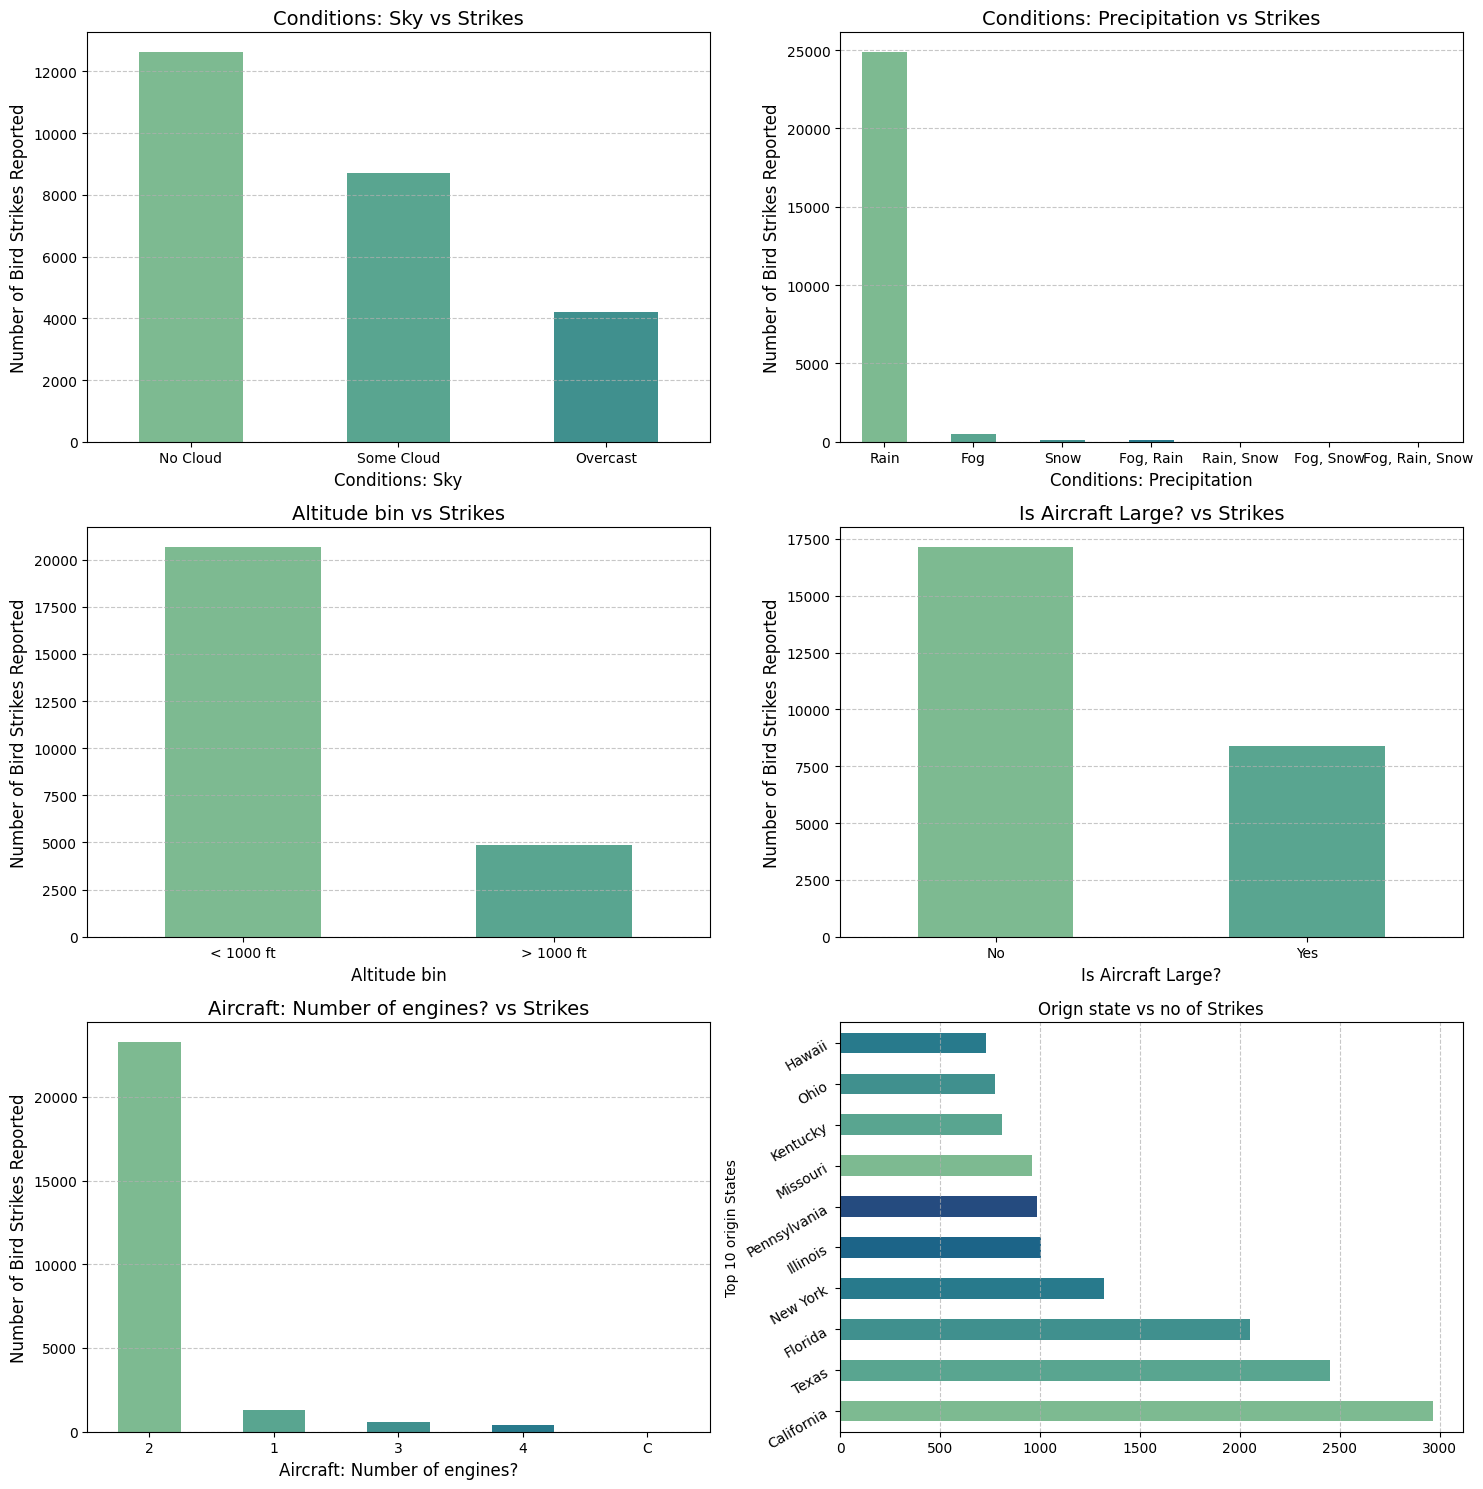

In [10]:
# Define data columns for iteration
columns = ['Conditions: Sky','Conditions: Precipitation', 'Altitude bin', 'Is Aircraft Large?', 'Aircraft: Number of engines?']

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    # Plot each column
    strike_counts = data[column].value_counts()
    strike_counts.plot(kind='bar', color=clr, ax=ax[row, col])
    ax[row, col].set_title(f"{column} vs Strikes", fontsize=14)
    ax[row, col].set_xlabel(column, fontsize=12)
    ax[row, col].set_ylabel("Number of Bird Strikes Reported", fontsize=12)
    ax[row, col].set_xticklabels(strike_counts.index, rotation=0)
    ax[row, col].grid(axis='y', linestyle='--', alpha=0.7)
    
data['Origin State'].value_counts().iloc[:10].plot(kind='barh',ax=ax[2,1],color=clr)
plt.yticks(rotation=30)
plt.ylabel("Top 10 origin States")
plt.title('Orign state vs no of Strikes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [11]:
data.columns
data.head()

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,year,month,day
Record ID,,,,,,,,,,,,,,,,,,,,,
204061,Airplane,KANSAS CITY INTL,< 1000 ft,MD-80,2 to 10,5.0,Precautionary Landing,02-01-2000,No damage,2,...,Some Cloud,Snow goose,Y,0,500,0.0,No,2000,1,2
201506,Airplane,WASHINGTON DULLES INTL ARPT,< 1000 ft,B-737-300,2 to 10,8.0,Precautionary Landing,04-01-2000,No damage,2,...,No Cloud,Unknown bird - small,N,0,"1,000",0.0,Yes,2000,1,4
201378,Airplane,LEWISTON-NEZ PERCE CO ARPT,< 1000 ft,C-150,1,1.0,Precautionary Landing,04-01-2000,No damage,1,...,No Cloud,Ring-necked pheasant,Y,0,50,0.0,No,2000,1,4
202333,Airplane,AUSTIN-BERGSTROM INTL,< 1000 ft,B-737-300,1,1.0,Precautionary Landing,05-01-2000,No damage,2,...,Some Cloud,Unknown bird - small,N,0,50,0.0,Yes,2000,1,5
202886,Airplane,SAVANNAH INTL,< 1000 ft,EMB-145,2 to 10,2.0,Precautionary Landing,06-01-2000,No damage,2,...,Overcast,Unknown bird - small,Y,0,0,0.0,No,2000,1,6


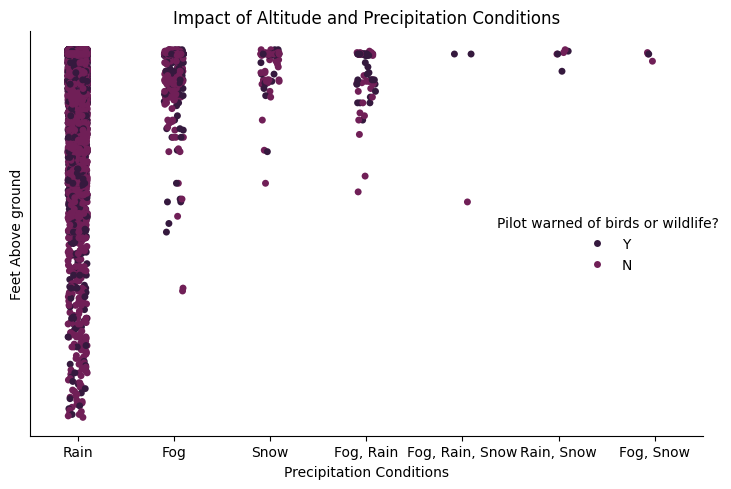

In [36]:
from sklearn.preprocessing import LabelEncoder
#columns_to_encode = ['Altitude bin', 'Conditions: Sky']
#label_encoder = LabelEncoder()
#for column in columns_to_encode:
#   data[column] = label_encoder.fit_transform(data[column])
sns.set_palette('rocket')
sns.catplot(data=data, x='Conditions: Precipitation', y='Feet above ground', hue='Pilot warned of birds or wildlife?')
plt.ylabel('Feet Above ground')
plt.xlabel('Precipitation Conditions')
plt.title("Impact of Altitude and Precipitation Conditions")
plt.yticks([])
plt.tight_layout()
plt.show()

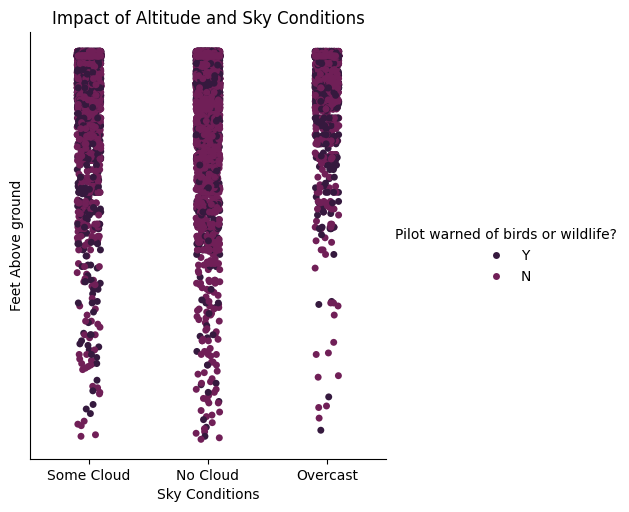

In [37]:
sns.catplot(data=data, x='Conditions: Sky', y='Feet above ground', hue='Pilot warned of birds or wildlife?')
plt.ylabel('Feet Above ground')
plt.title("Impact of Altitude and Sky Conditions")
plt.xlabel('Sky Conditions')
plt.yticks([]) 
plt.show() 

4. **Wildlife Analysis:**
   - What are the most commonly struck bird species?
   - How does the size of the bird (small, medium, large) impact the frequency and severity of strikes?
5. **Impact and Damage Analysis:**
   - What is the distribution of reported damages (caused damage vs. no damage) in bird strikes?
   - How often do bird strikes lead to precautionary landings or aborted takeoffs?
   - What is the economic impact (total cost) of bird strikes on airlines?
   - What is the correlation between the number of birds struck and the severity of the damage?

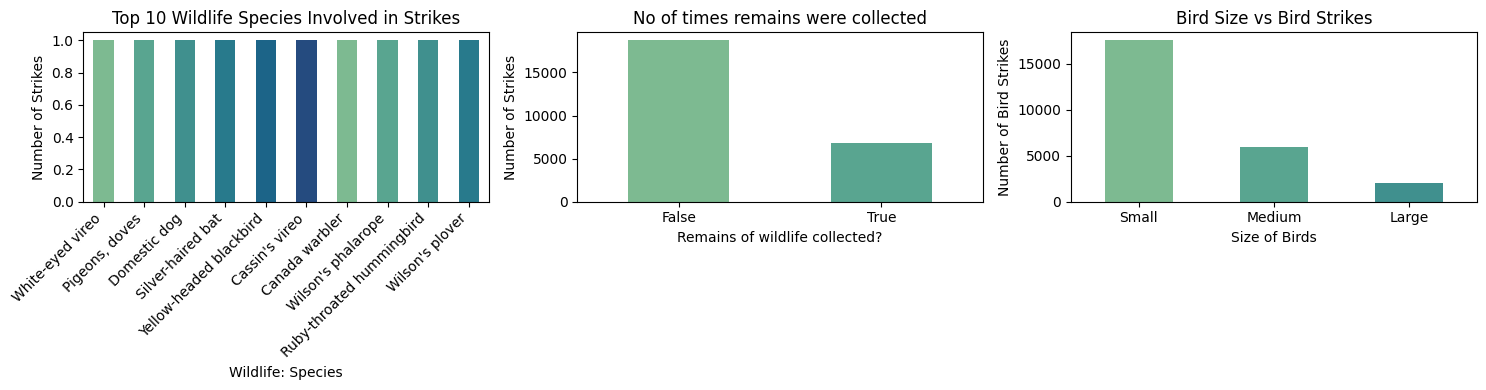

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
birdSize_strike = data['Wildlife: Size'].value_counts()
birdSize_strike.plot(kind='bar', color=clr, ax=ax[2])

ax[2].set_xlabel("Size of Birds")  # Setting xlabel for the third subplot
ax[2].set_ylabel("Number of Bird Strikes")  # Setting ylabel for the third subplot
ax[2].set_title("Bird Size vs Bird Strikes")  # Setting title for the third subplot
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)  # Rotating x-axis labels for better readability

data['Remains of wildlife collected?'].value_counts().dropna().plot(kind='bar', ax=ax[1], color=clr)
ax[1].set_ylabel('Number of Strikes')  # Setting ylabel for the second subplot
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)  # Rotating x-axis labels for better readability
ax[1].set_title('No of times remains were collected')

data['Wildlife: Species'].value_counts().dropna().sort_values().iloc[:10].plot(kind='bar', ax=ax[0], color=clr)

ax[0].set_ylabel('Number of Strikes')  # Setting ylabel for the first subplot
ax[0].set_title('Top 10 Wildlife Species Involved in Strikes')  # Setting title for the first subplot
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Rotating x-axis labels for better readability

plt.tight_layout()
plt.show()


In [15]:
print("null values in 'Wildlife: Number struck'", data['Wildlife: Number struck'].isnull().sum())

modal_val= data['Wildlife: Number struck'].mode()[0]
#handel missing values
data['Wildlife: Number struck'].fillna(modal_val,inplace=True)

#null values in this column
print("null values in 'Effect: Indicated Damage'",data['Effect: Indicated Damage'].isnull().sum())
#no null values

print("Null values have now been Handled!")
print("null values in 'Wildlife: Number struck'", data['Wildlife: Number struck'].isnull().sum())

null values in 'Wildlife: Number struck' 0
null values in 'Effect: Indicated Damage' 0
Null values have now been Handled!
null values in 'Wildlife: Number struck' 0


C:\Users\khush\AppData\Local\Temp\ipykernel_3380\3003964235.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Wildlife: Number struck'].fillna(modal_val,inplace=True)


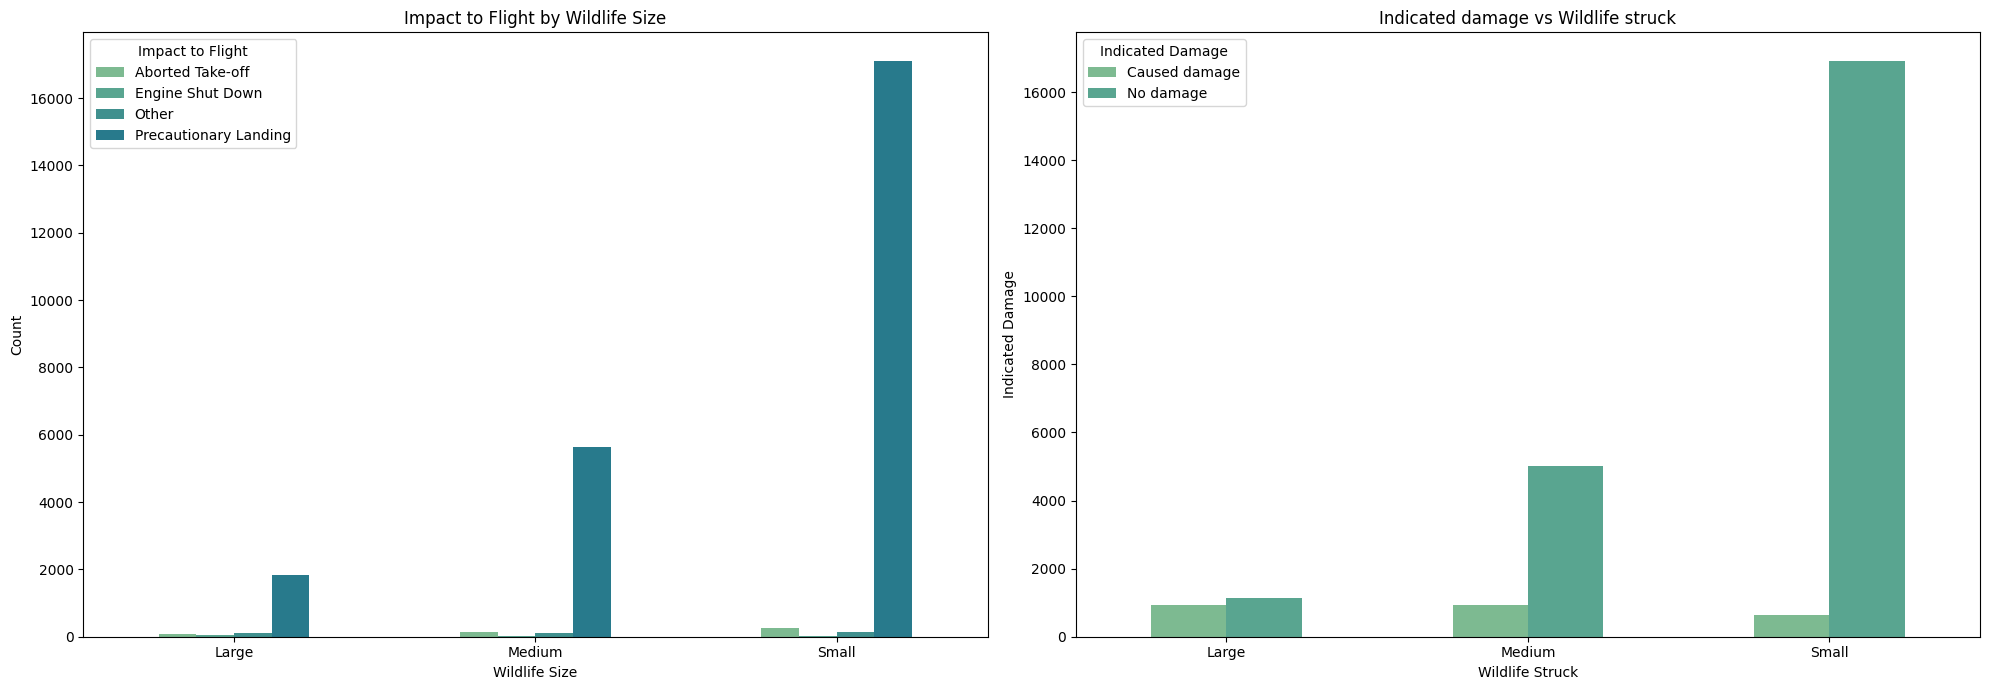

In [16]:
impact_counts = data.groupby('Wildlife: Size')['Effect: Impact to flight'].value_counts().unstack().fillna(0)
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

colors = sns.color_palette("husl", 4)

# Plotting the first subplot
impact_counts.plot(kind='bar', color=clr, ax=ax[0])
ax[0].set_xticklabels(impact_counts.index, rotation=0)
ax[0].set_title('Impact to Flight by Wildlife Size')
ax[0].set_xlabel('Wildlife Size')
ax[0].set_ylabel('Count')
ax[0].legend(title='Impact to Flight')

# Plotting the second subplot
data_damage = data.groupby('Wildlife: Size')['Effect: Indicated Damage'].value_counts().dropna().unstack()
data_damage.plot(kind='bar', ax=ax[1], color=clr)
ax[1].set_xticklabels(data_damage.index, rotation=0)
ax[1].set_title('Indicated damage vs Wildlife struck')
ax[1].set_xlabel('Wildlife Struck')
ax[1].set_ylabel('Indicated Damage')
ax[1].legend(title='Indicated Damage')

plt.tight_layout()
plt.show()


In [17]:
data.columns
data['Cost: Total $'] = pd.to_numeric(data['Cost: Total $'], errors='coerce')
data['Cost: Total $'].info()

<class 'pandas.core.series.Series'>
Index: 25548 entries, 204061 to 319680
Series name: Cost: Total $
Non-Null Count  Dtype  
--------------  -----  
24711 non-null  float64
dtypes: float64(1)
memory usage: 399.2 KB


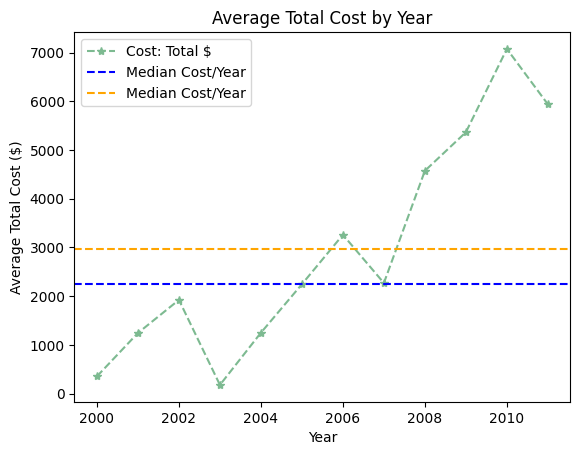

Mean Total Cost (Damage):$ 2973.9166666666665
Median Total Cost (Damage):$ 2258.5


In [45]:
data.groupby('year')['Cost: Total $'].sum().dropna().plot(kind='line',color=clr,marker='*',linestyle='--')
# Add labels and title for better clarity
mid_cost=data.groupby('year')['Cost: Total $'].sum().median()
mean_cost=data.groupby('year')['Cost: Total $'].sum().mean()
plt.axhline(mid_cost,color='blue',linestyle='--',label='Median Cost/Year')
plt.axhline(mean_cost,color='orange',linestyle='--',label='Median Cost/Year')
plt.xlabel('Year')
plt.ylabel('Average Total Cost ($)')
plt.title('Average Total Cost by Year')
plt.legend()
plt.show()

print("Mean Total Cost (Damage):$",mean_cost)
print("Median Total Cost (Damage):$",mid_cost)


6. **Safety and Prevention:**
   - How often are pilots warned of birds or wildlife before a strike?
   - How effective are preventive measures, such as warnings, in reducing the number of bird strikes?

In [19]:
data.columns

Index(['Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'year', 'month', 'day'],
      dtype='object')

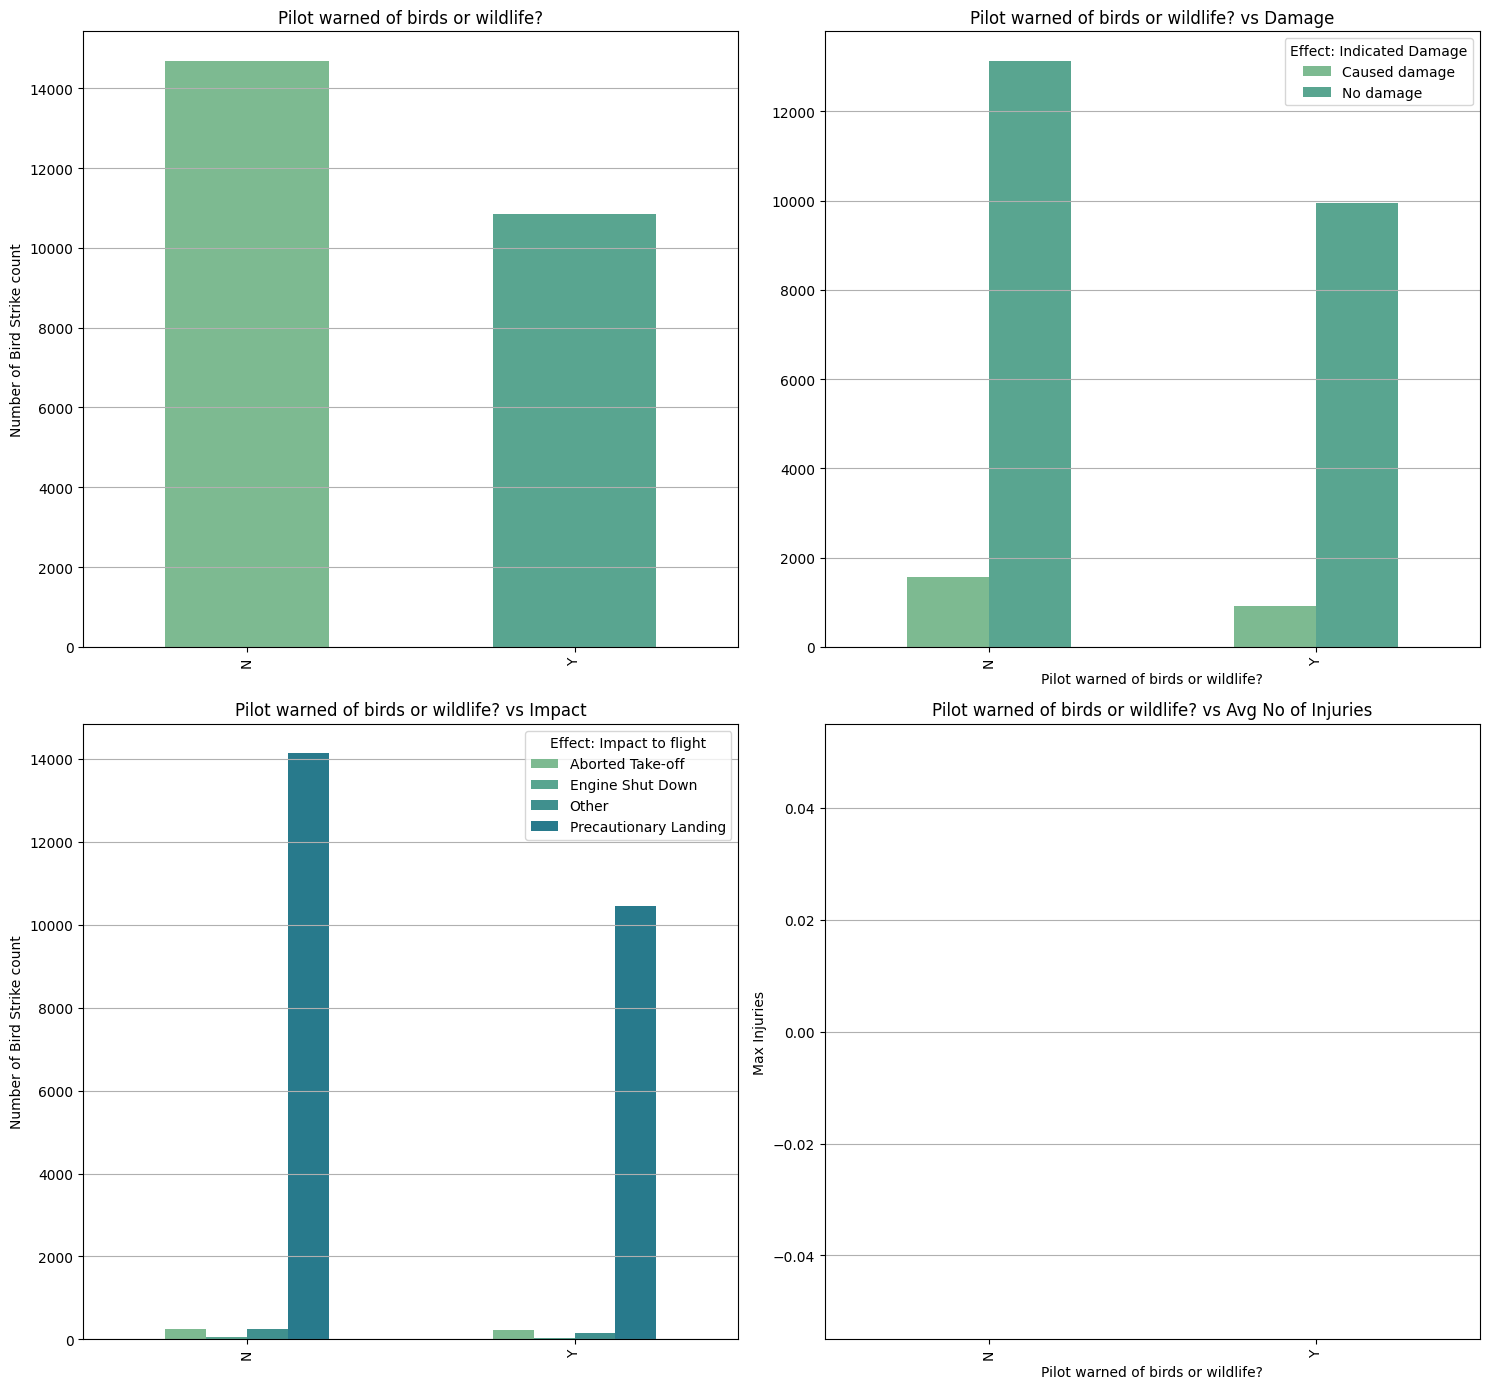

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(15, 14))
color1 = sns.color_palette('husl', 4)
informed_pilot = data['Pilot warned of birds or wildlife?'].value_counts().dropna().plot(kind='bar', color=clr, ax=ax[0,0])
ax[0,0].set_title('Pilot warned of birds or wildlife?')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel("Number of Bird Strike count")
ax[0,0].grid(axis='y')

informed_pilot_damage=data.groupby('Pilot warned of birds or wildlife?')['Effect: Indicated Damage'].value_counts().dropna().unstack()
informed_pilot_damage.plot(kind='bar',color=clr,ax=ax[0,1])
ax[0,1].set_title('Pilot warned of birds or wildlife? vs Damage')
ax[0,1].grid(axis='y')


informed_pilot_effect=data.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().dropna().unstack()
informed_pilot_effect.plot(kind='bar',color=clr,ax=ax[1,0])
ax[1,0].set_title('Pilot warned of birds or wildlife? vs Impact')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel("Number of Bird Strike count")
ax[1,0].grid(axis='y')

ax[1,1].set_title('')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel("")
ax[1,1].grid(axis='y')


informed_pilot_injuries = data.groupby('Pilot warned of birds or wildlife?')['Number of people injured'].max()

# Plot the mode values as a bar plot
informed_pilot_injuries.plot(kind='bar', color=clr)

# Set title and labels for the plot
plt.title('Pilot warned of birds or wildlife? vs Avg No of Injuries')
plt.xlabel('Pilot warned of birds or wildlife?')
plt.ylabel('Max Injuries')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

